Logistic Regression (Titanic_train)


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Titanic_train.csv to Titanic_train.csv


In [ ]:
Tit = pd.read_csv("Titanic_train.csv")
Tit

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [ ]:
Tit.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
Tit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
Tit.shape

(891, 12)

In [ ]:
unique_values = Tit['Embarked'].unique()
print(unique_values)


['S' 'C' 'Q' nan]


In [ ]:
unique_values = Tit['Survived'].unique()
print(unique_values)

[0 1]


In [ ]:
unique_values = Tit['Cabin'].unique()
print(unique_values)

[nan 'C85' 'C123' 'E46' 'G6' 'C103' 'D56' 'A6' 'C23 C25 C27' 'B78' 'D33'
 'B30' 'C52' 'B28' 'C83' 'F33' 'F G73' 'E31' 'A5' 'D10 D12' 'D26' 'C110'
 'B58 B60' 'E101' 'F E69' 'D47' 'B86' 'F2' 'C2' 'E33' 'B19' 'A7' 'C49'
 'F4' 'A32' 'B4' 'B80' 'A31' 'D36' 'D15' 'C93' 'C78' 'D35' 'C87' 'B77'
 'E67' 'B94' 'C125' 'C99' 'C118' 'D7' 'A19' 'B49' 'D' 'C22 C26' 'C106'
 'C65' 'E36' 'C54' 'B57 B59 B63 B66' 'C7' 'E34' 'C32' 'B18' 'C124' 'C91'
 'E40' 'T' 'C128' 'D37' 'B35' 'E50' 'C82' 'B96 B98' 'E10' 'E44' 'A34'
 'C104' 'C111' 'C92' 'E38' 'D21' 'E12' 'E63' 'A14' 'B37' 'C30' 'D20' 'B79'
 'E25' 'D46' 'B73' 'C95' 'B38' 'B39' 'B22' 'C86' 'C70' 'A16' 'C101' 'C68'
 'A10' 'E68' 'B41' 'A20' 'D19' 'D50' 'D9' 'A23' 'B50' 'A26' 'D48' 'E58'
 'C126' 'B71' 'B51 B53 B55' 'D49' 'B5' 'B20' 'F G63' 'C62 C64' 'E24' 'C90'
 'C45' 'E8' 'B101' 'D45' 'C46' 'D30' 'E121' 'D11' 'E77' 'F38' 'B3' 'D6'
 'B82 B84' 'D17' 'A36' 'B102' 'B69' 'E49' 'C47' 'D28' 'E17' 'A24' 'C50'
 'B42' 'C148']


In [ ]:
Tit.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [ ]:
Tit = Tit.dropna()

<ipython-input-151-2a398d58dbda>:10: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




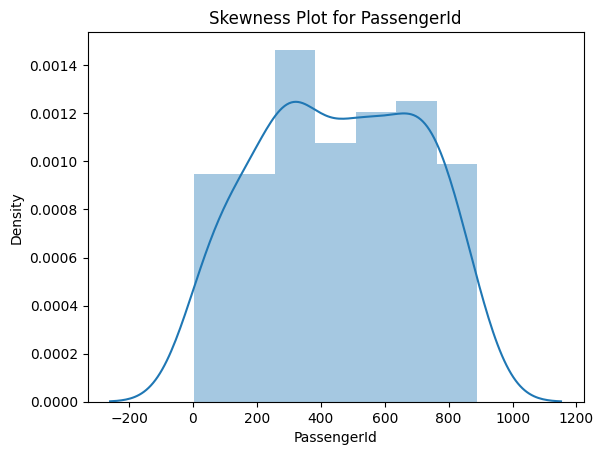

<ipython-input-151-2a398d58dbda>:10: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




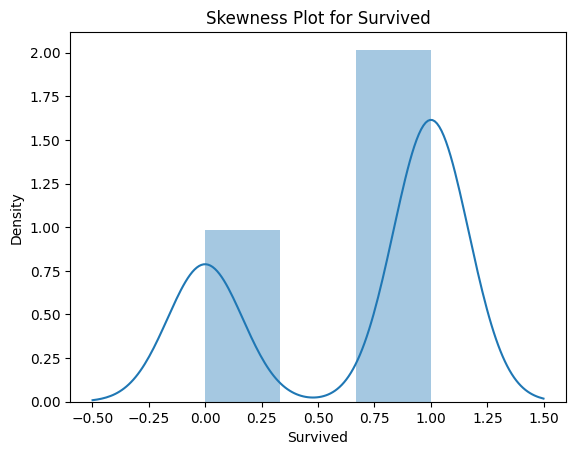

<ipython-input-151-2a398d58dbda>:10: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




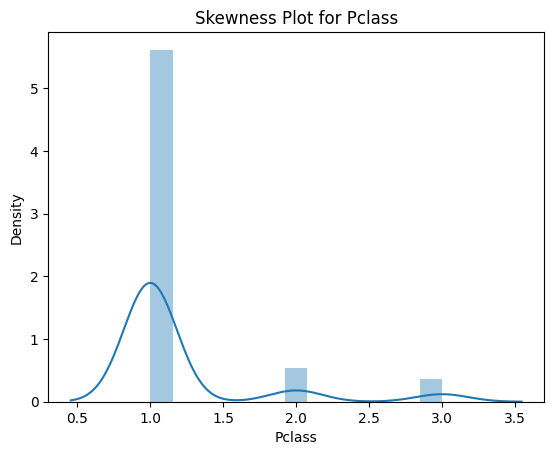

<ipython-input-151-2a398d58dbda>:10: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




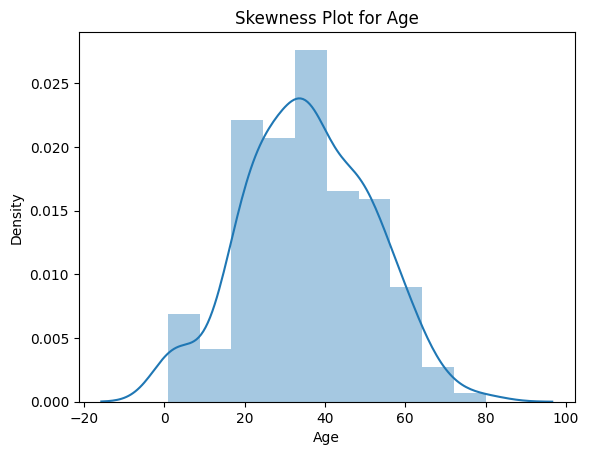

<ipython-input-151-2a398d58dbda>:10: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




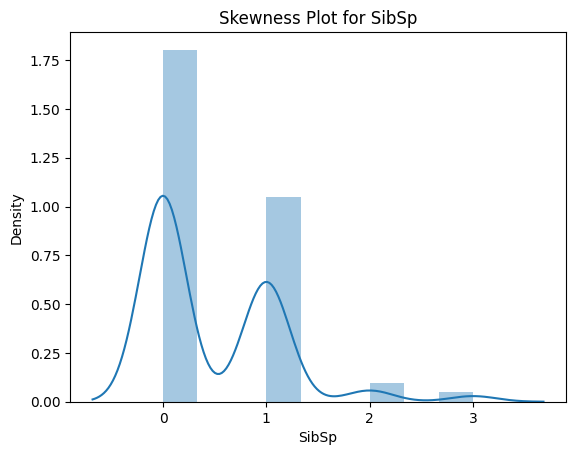

<ipython-input-151-2a398d58dbda>:10: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




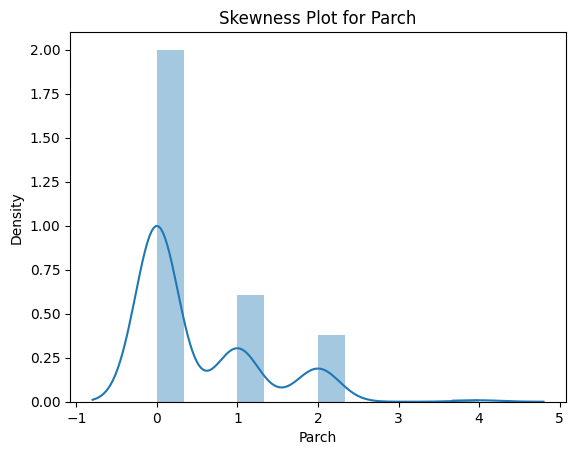

<ipython-input-151-2a398d58dbda>:10: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




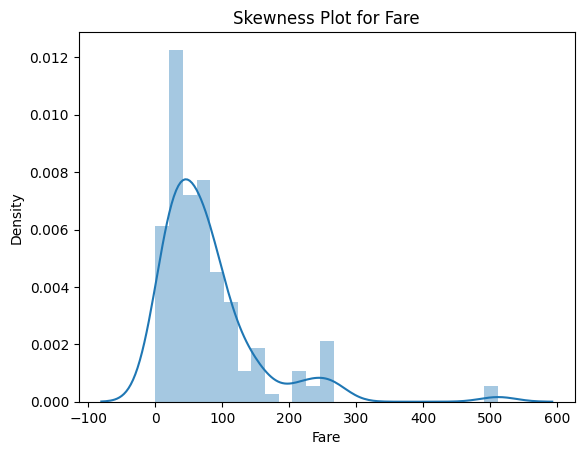

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a list of numeric columns
numeric_columns = Tit.select_dtypes(include=['int64', 'float64']).columns

# Plot the skewness of each numeric column
for col in numeric_columns:
  plt.figure()
  sns.distplot(Tit[col])
  plt.title('Skewness Plot for ' + col)
  plt.show()

In [ ]:
Tit.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

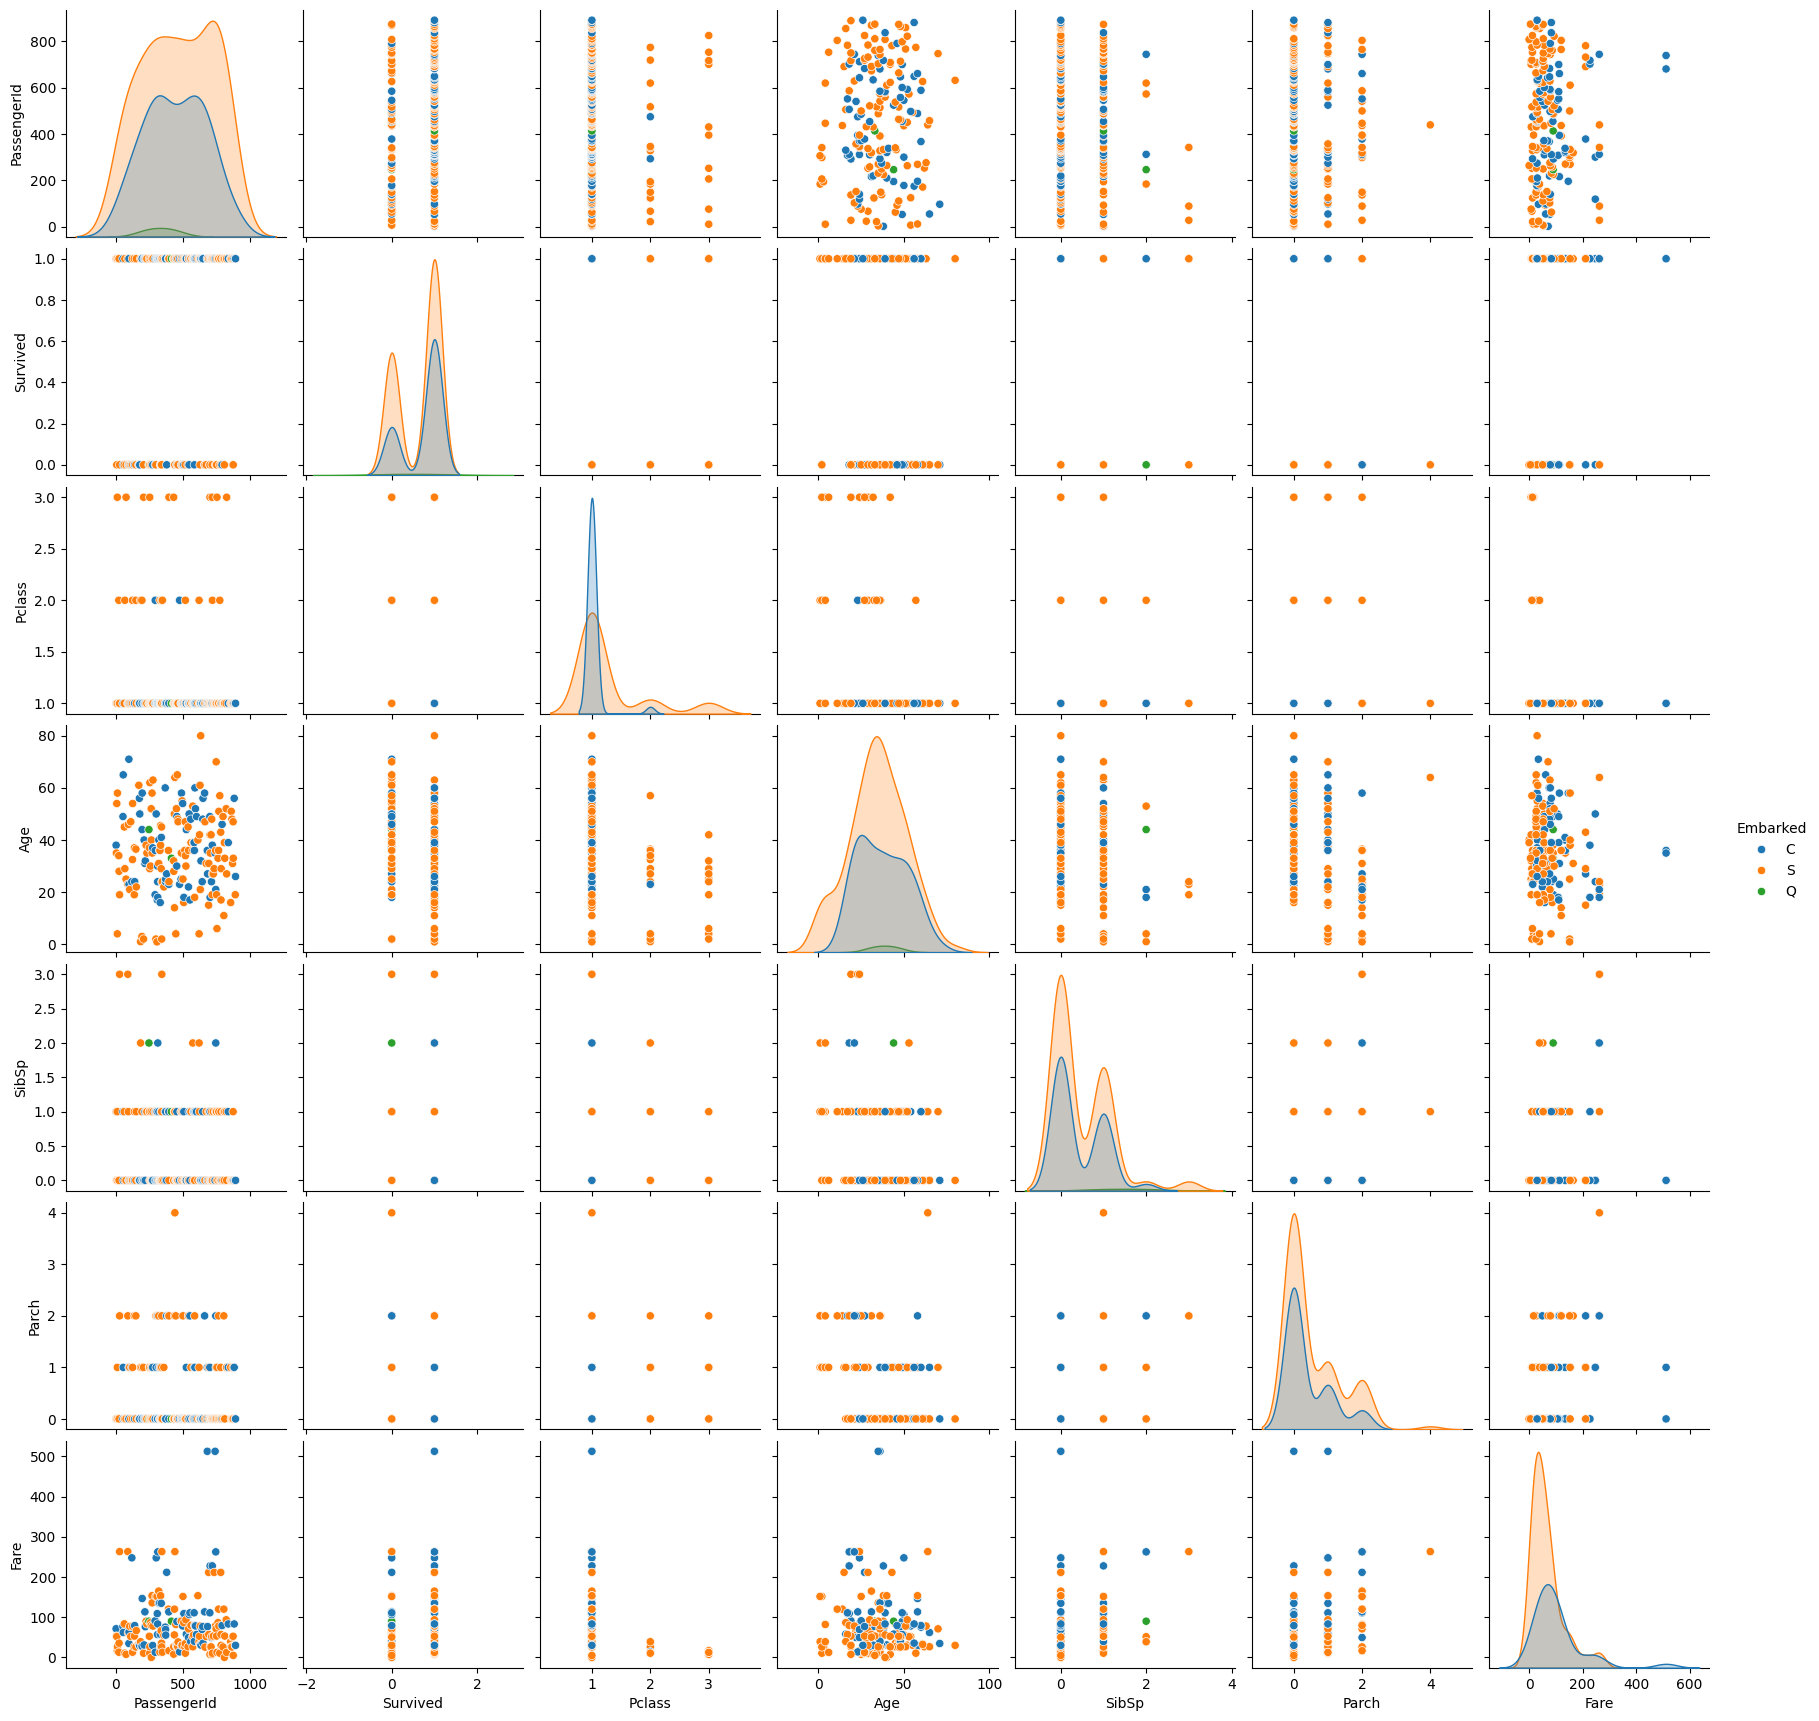

In [ ]:
import seaborn as sns

sns.pairplot(Tit, hue='Embarked')

In [ ]:
# Identify the non-numeric column
non_numeric_cols = Tit.select_dtypes(include=['object']).columns

# Drop the non-numeric columns
Tit = Tit.drop(non_numeric_cols, axis=1)
Tit.corr()


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,0.148495,-0.089136,0.030933,-0.083488,-0.051454,0.029740
Survived,0.148495,1.000000,-0.034542,-0.254085,0.106346,0.023582,0.134241
Pclass,-0.089136,-0.034542,1.000000,-0.306514,-0.103592,0.047496,-0.315235
Age,0.030933,-0.254085,-0.306514,1.000000,-0.156162,-0.271271,-0.092424
SibSp,-0.083488,0.106346,-0.103592,-0.156162,1.000000,0.255346,0.286433
Parch,-0.051454,0.023582,0.047496,-0.271271,0.255346,1.000000,0.389740
Fare,0.029740,0.134241,-0.315235,-0.092424,0.286433,0.389740,1.000000


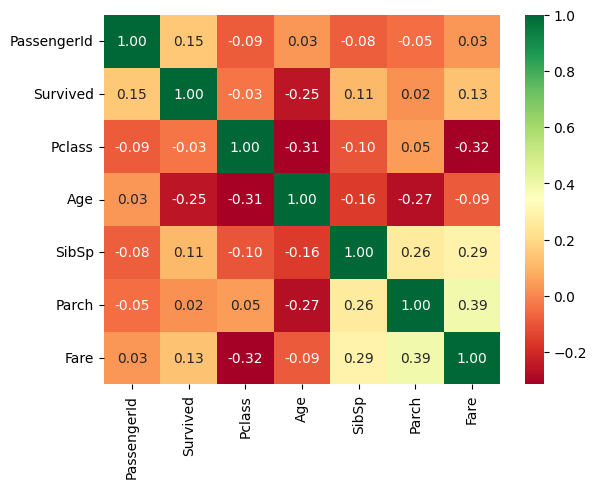

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
corr = Tit.corr()
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, cmap='RdYlGn', fmt='.2f')
plt.show()

In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

for column in Tit.select_dtypes(include='object'):
    Tit[column] = le.fit_transform(Tit[column])

Tit.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
1,2,1,1,38.0,1,0,71.2833
3,4,1,1,35.0,1,0,53.1000
6,7,0,1,54.0,0,0,51.8625
10,11,1,3,4.0,1,1,16.7000
11,12,1,1,58.0,0,0,26.5500


In [ ]:
Tit.info()

<class 'pandas.core.frame.DataFrame'>
Index: 183 entries, 1 to 889
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  183 non-null    int64  
 1   Survived     183 non-null    int64  
 2   Pclass       183 non-null    int64  
 3   Age          183 non-null    float64
 4   SibSp        183 non-null    int64  
 5   Parch        183 non-null    int64  
 6   Fare         183 non-null    float64
dtypes: float64(2), int64(5)
memory usage: 11.4 KB


In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
Tit_scaled = scaler.fit_transform(Tit)

Tit_scaled = pd.DataFrame(Tit_scaled, columns=Tit.columns)
Tit_scaled.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,0.000000,1.0,0.0,0.468892,0.333333,0.00,0.139136
1,0.002252,1.0,0.0,0.430956,0.333333,0.00,0.103644
2,0.005631,0.0,0.0,0.671219,0.000000,0.00,0.101229
3,0.010135,1.0,1.0,0.038948,0.333333,0.25,0.032596
4,0.011261,1.0,0.0,0.721801,0.000000,0.00,0.051822


In [ ]:
Tit

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
1,2,1,1,38.0,1,0,71.2833
3,4,1,1,35.0,1,0,53.1000
6,7,0,1,54.0,0,0,51.8625
10,11,1,3,4.0,1,1,16.7000
11,12,1,1,58.0,0,0,26.5500
...,...,...,...,...,...,...,...
871,872,1,1,47.0,1,1,52.5542
872,873,0,1,33.0,0,0,5.0000
879,880,1,1,56.0,0,1,83.1583
887,888,1,1,19.0,0,0,30.0000


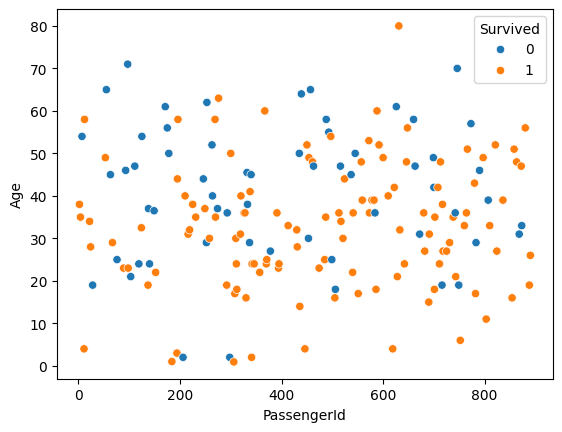

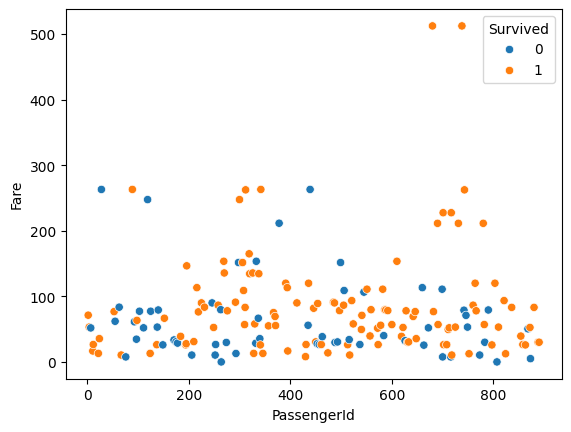

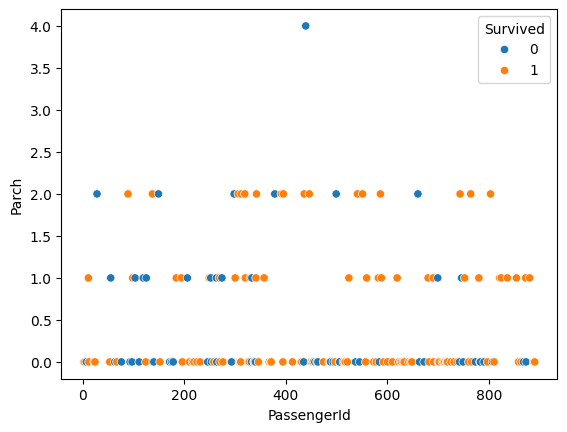

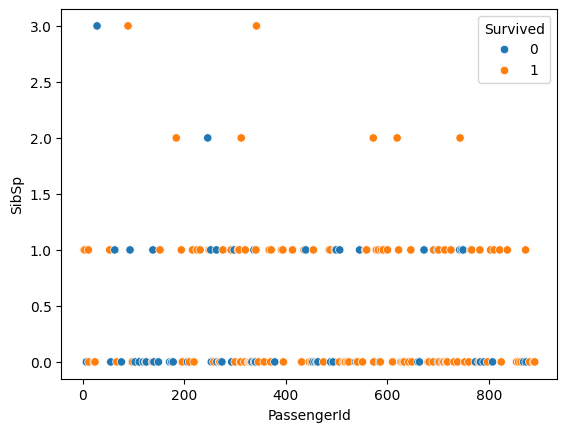

In [ ]:
sns.scatterplot(x="PassengerId", y="Age", hue="Survived", data=Tit, legend="brief")
plt.show()
sns.scatterplot(x="PassengerId", y="Fare", hue="Survived", data=Tit, legend="brief")
plt.show()
sns.scatterplot(x="PassengerId", y="Parch", hue="Survived", data=Tit, legend="brief")
plt.show()
sns.scatterplot(x="PassengerId", y="SibSp", hue="Survived", data=Tit, legend="brief")
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [ ]:
## divide the data into x and y or input or output variables
X= Tit.iloc[:, :-1]   ## independent variable set
y = Tit.iloc[:, -1]  ### dependent varable set

In [ ]:
X

,PassengerId,Survived,Pclass,Age,SibSp,Parch
1,2,1,1,38.0,1,0
3,4,1,1,35.0,1,0
6,7,0,1,54.0,0,0
10,11,1,3,4.0,1,1
11,12,1,1,58.0,0,0
...,...,...,...,...,...,...
871,872,1,1,47.0,1,1
872,873,0,1,33.0,0,0
879,880,1,1,56.0,0,1
887,888,1,1,19.0,0,0


In [ ]:
y

1      71.2833
3      53.1000
6      51.8625
10     16.7000
11     26.5500
        ...   
871    52.5542
872     5.0000
879    83.1583
887    30.0000
889    30.0000
Name: Fare, Length: 183, dtype: float64

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)



In [ ]:
print(y_train.dtype)

float64


In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y_train = le.fit_transform(y_train)

In [ ]:
model = LogisticRegression()
model.fit(X_train_scaled, y_train)

LogisticRegression()

In [ ]:
predictions = model.predict(X_test_scaled)

In [ ]:
y_test = pd.to_numeric(y_test)

In [ ]:
# Convert y_test to a categorical type
y_test = y_test.astype('category')

# Use the LabelEncoder to transform y_test
le = LabelEncoder()
y_test = le.fit_transform(y_test)

# Calculate the accuracy score
accuracy = accuracy_score(y_test, predictions)
print(f'Accuracy: {accuracy}')

Accuracy: 0.02702702702702703


In [ ]:
import pandas as pd
import numpy as np

In [ ]:
print(f"Data type of x: {type(X)}")
print(f"Data type of y: {type(y)}")

Data type of x: <class 'pandas.core.frame.DataFrame'>
Data type of y: <class 'pandas.core.series.Series'>


In [ ]:
from sklearn.preprocessing import LabelEncoder

# Instantiate the LabelEncoder
le = LabelEncoder()

# Fit the LabelEncoder to the y variable
le.fit(y)

# Transform the y variable using the fitted LabelEncoder
y = le.transform(y)

# Instantiate and fit the Logistic Regression model
classifier = LogisticRegression()
classifier.fit(X, y)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



LogisticRegression()

In [ ]:
## logistic regression and fit the model
classifier = LogisticRegression()  ## initilize the model i.e. called instance creation of class object.
# first create object 'classifier' for class logisticregression
classifier.fit(X,y)  ## then use this object to fit the model. this is the std methodology to build any algo. in sklearn

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



LogisticRegression()

In [ ]:
## predict for x
y_pred = classifier.predict(X)
y_pred

array([41, 41, 41, 91, 41, 30, 30, 61, 30, 30, 28, 17, 17, 17, 17, 28, 17,
       17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17,  6,  6, 17, 17,
        6, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17,
        5, 17,  6, 17,  6, 23, 17,  5, 23, 17, 17, 17, 17, 23, 17, 17, 17,
       17, 17,  6,  5,  5, 23, 17,  5,  5,  5, 17, 23,  5,  5,  5,  5, 17,
       79, 17,  6, 17,  5, 17, 17, 17, 17, 23, 23,  5, 17, 17, 17, 23, 79,
       23,  5, 17,  5, 23, 17, 17, 23,  5, 17, 79, 17,  5, 17,  5,  5,  5,
       23, 79, 17, 17, 17,  5,  6,  5, 17, 23, 17, 23, 23,  5, 17, 17,  5,
       23, 23, 23,  6, 23,  5, 23, 79, 23, 23, 23,  5, 79, 23, 23, 23, 23,
       23, 23, 79, 17, 79,  6, 23, 23,  5,  5, 23,  6, 23, 23, 23,  6, 23,
       23,  5, 79, 23,  6, 23, 23, 23, 23, 23,  5,  6, 79])

In [ ]:
y = pd.DataFrame(y)
y.head()

,0
0,57
1,44
2,41
3,10
4,17


In [ ]:
## confusion matrix for to analyze how many wrong predctions are there in the table

from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y,y_pred)
print(confusion_matrix)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [ ]:
## sir i dont include ROC curve beacuse i am stuck at one code while roc_curve  classifier.predict_proba
#  there i dont understand which value s
## we have to provide for predict_proba

Titanic_test

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Titanic_test.csv to Titanic_test (1).csv


In [ ]:
titanic = pd.read_csv("Titanic_test.csv")
titanic

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [ ]:
titanic.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [ ]:
unique_values = titanic['PassengerId'].unique()
print(unique_values)

[ 892  893  894  895  896  897  898  899  900  901  902  903  904  905
  906  907  908  909  910  911  912  913  914  915  916  917  918  919
  920  921  922  923  924  925  926  927  928  929  930  931  932  933
  934  935  936  937  938  939  940  941  942  943  944  945  946  947
  948  949  950  951  952  953  954  955  956  957  958  959  960  961
  962  963  964  965  966  967  968  969  970  971  972  973  974  975
  976  977  978  979  980  981  982  983  984  985  986  987  988  989
  990  991  992  993  994  995  996  997  998  999 1000 1001 1002 1003
 1004 1005 1006 1007 1008 1009 1010 1011 1012 1013 1014 1015 1016 1017
 1018 1019 1020 1021 1022 1023 1024 1025 1026 1027 1028 1029 1030 1031
 1032 1033 1034 1035 1036 1037 1038 1039 1040 1041 1042 1043 1044 1045
 1046 1047 1048 1049 1050 1051 1052 1053 1054 1055 1056 1057 1058 1059
 1060 1061 1062 1063 1064 1065 1066 1067 1068 1069 1070 1071 1072 1073
 1074 1075 1076 1077 1078 1079 1080 1081 1082 1083 1084 1085 1086 1087
 1088 

In [ ]:
unique_values = titanic['Embarked'].unique()
print(unique_values)

['S' 'C' 'Q']


In [ ]:

unique_values = titanic['Age'].unique()
print(unique_values)

[34.5  47.   62.   27.   22.   14.   30.   26.   18.   21.     nan 46.
 23.   63.   24.   35.   45.   55.    9.   48.   50.   22.5  41.   33.
 18.5  25.   39.   60.   36.   20.   28.   10.   17.   32.   13.   31.
 29.   28.5  32.5   6.   67.   49.    2.   76.   43.   16.    1.   12.
 42.   53.   26.5  40.   61.   60.5   7.   15.   54.   64.   37.   34.
 11.5   8.    0.33 38.   57.   40.5   0.92 19.   36.5   0.75  0.83 58.
  0.17 59.   14.5  44.    5.   51.    3.   38.5 ]


In [ ]:
unique_values = titanic['Pclass'].unique()
print(unique_values)

[3 2 1]


In [ ]:
unique_values = titanic['SibSp'].unique()
print(unique_values)

[0 1 2 3 4 5 8]


In [ ]:
titanic.tail()


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S
417,1309,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,NaN,C


In [ ]:
titanic = titanic.dropna()

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:

# Create a list of numeric columns
numeric_columns = titanic.select_dtypes(include=['int64', 'float64']).columns

<ipython-input-232-0510b915508f>:4: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




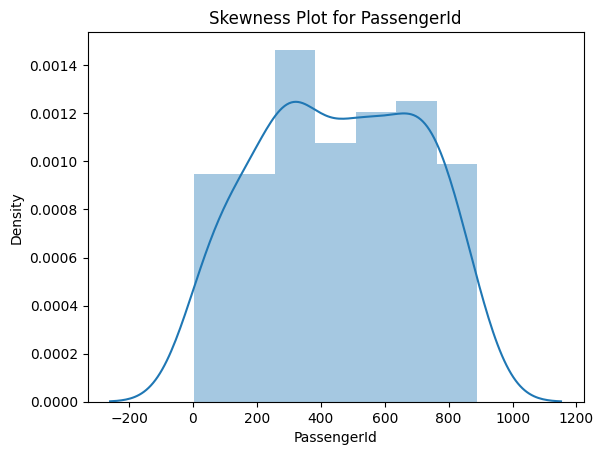

<ipython-input-232-0510b915508f>:4: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




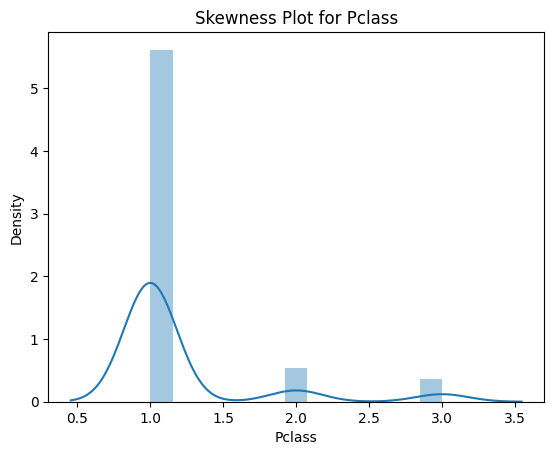

<ipython-input-232-0510b915508f>:4: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




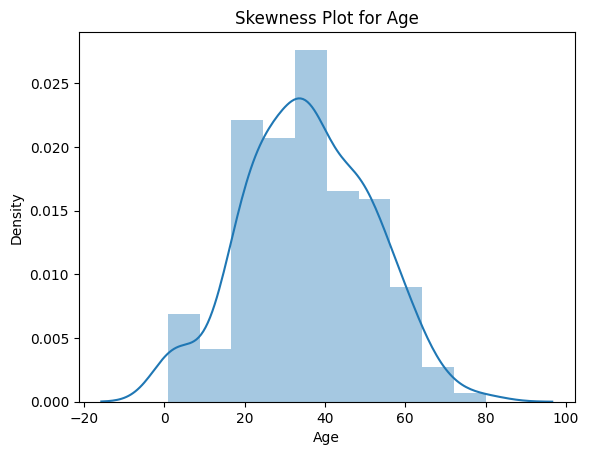

<ipython-input-232-0510b915508f>:4: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




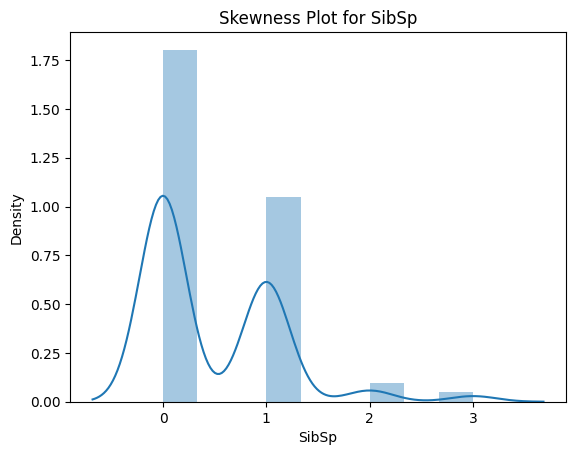

<ipython-input-232-0510b915508f>:4: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




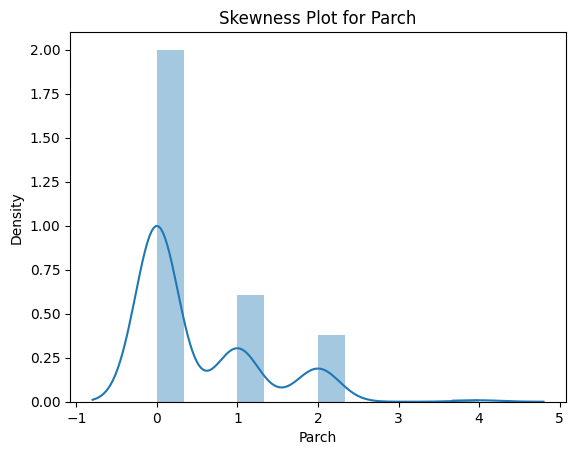

<ipython-input-232-0510b915508f>:4: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




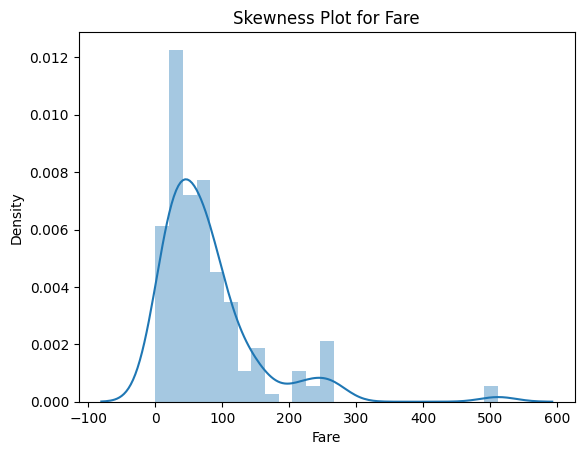

In [ ]:
# Plot the skewness of each numeric column
for col in numeric_columns:
  plt.figure()
  sns.distplot(Tit[col])
  plt.title('Skewness Plot for ' + col)
  plt.show()
  titanic.isna().sum()
  import seaborn as sns

In [ ]:
titanic.head(1)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
12,904,1,"Snyder, Mrs. John Pillsbury (Nelle Stevenson)",female,23.0,1,0,21228,82.2667,B45,S


In [ ]:
titanic.columns

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [ ]:
titanic['Embarked'].isnull().sum()

0

In [ ]:
# Create a list of numeric columns
numeric_columns = titanic.select_dtypes(include=['int64', 'float64']).columns

<ipython-input-242-71ead5d753ab>:7: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




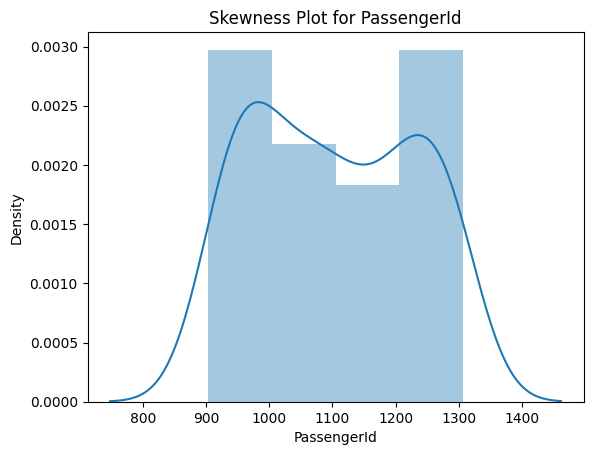

<ipython-input-242-71ead5d753ab>:7: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




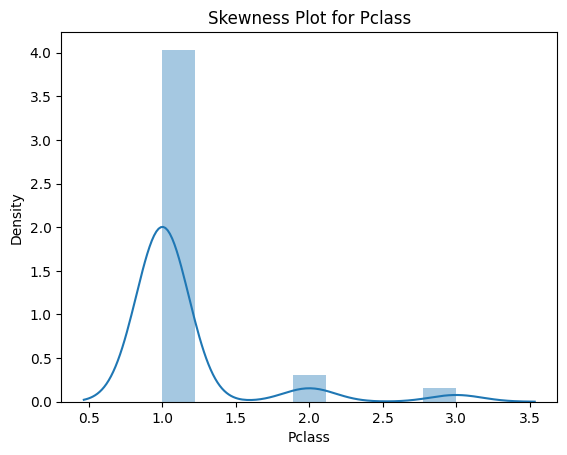

<ipython-input-242-71ead5d753ab>:7: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




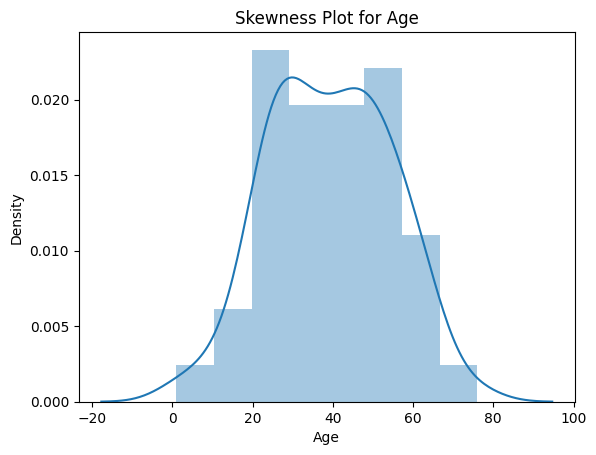

<ipython-input-242-71ead5d753ab>:7: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




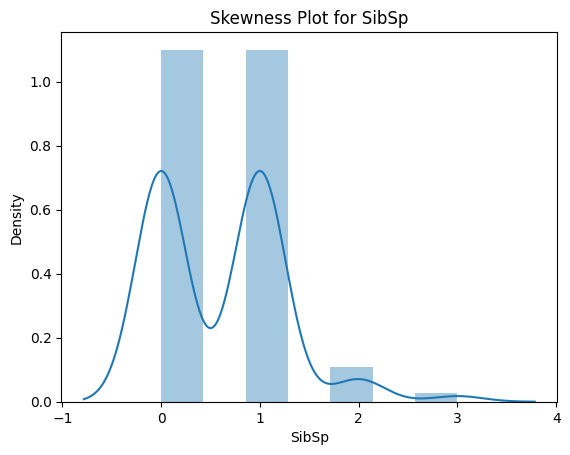

<ipython-input-242-71ead5d753ab>:7: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




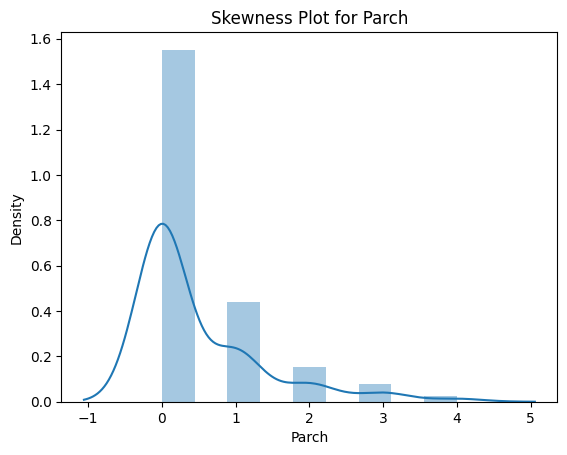

<ipython-input-242-71ead5d753ab>:7: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




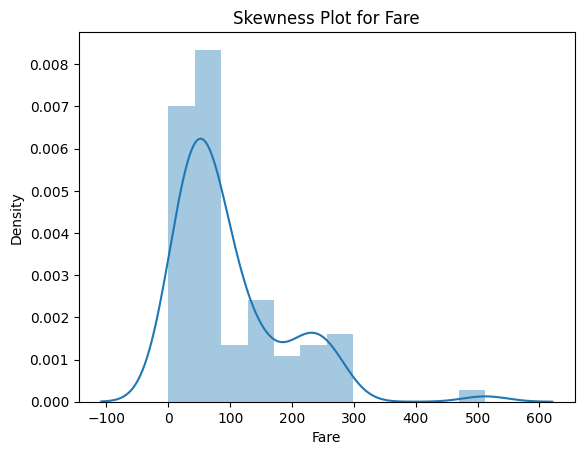

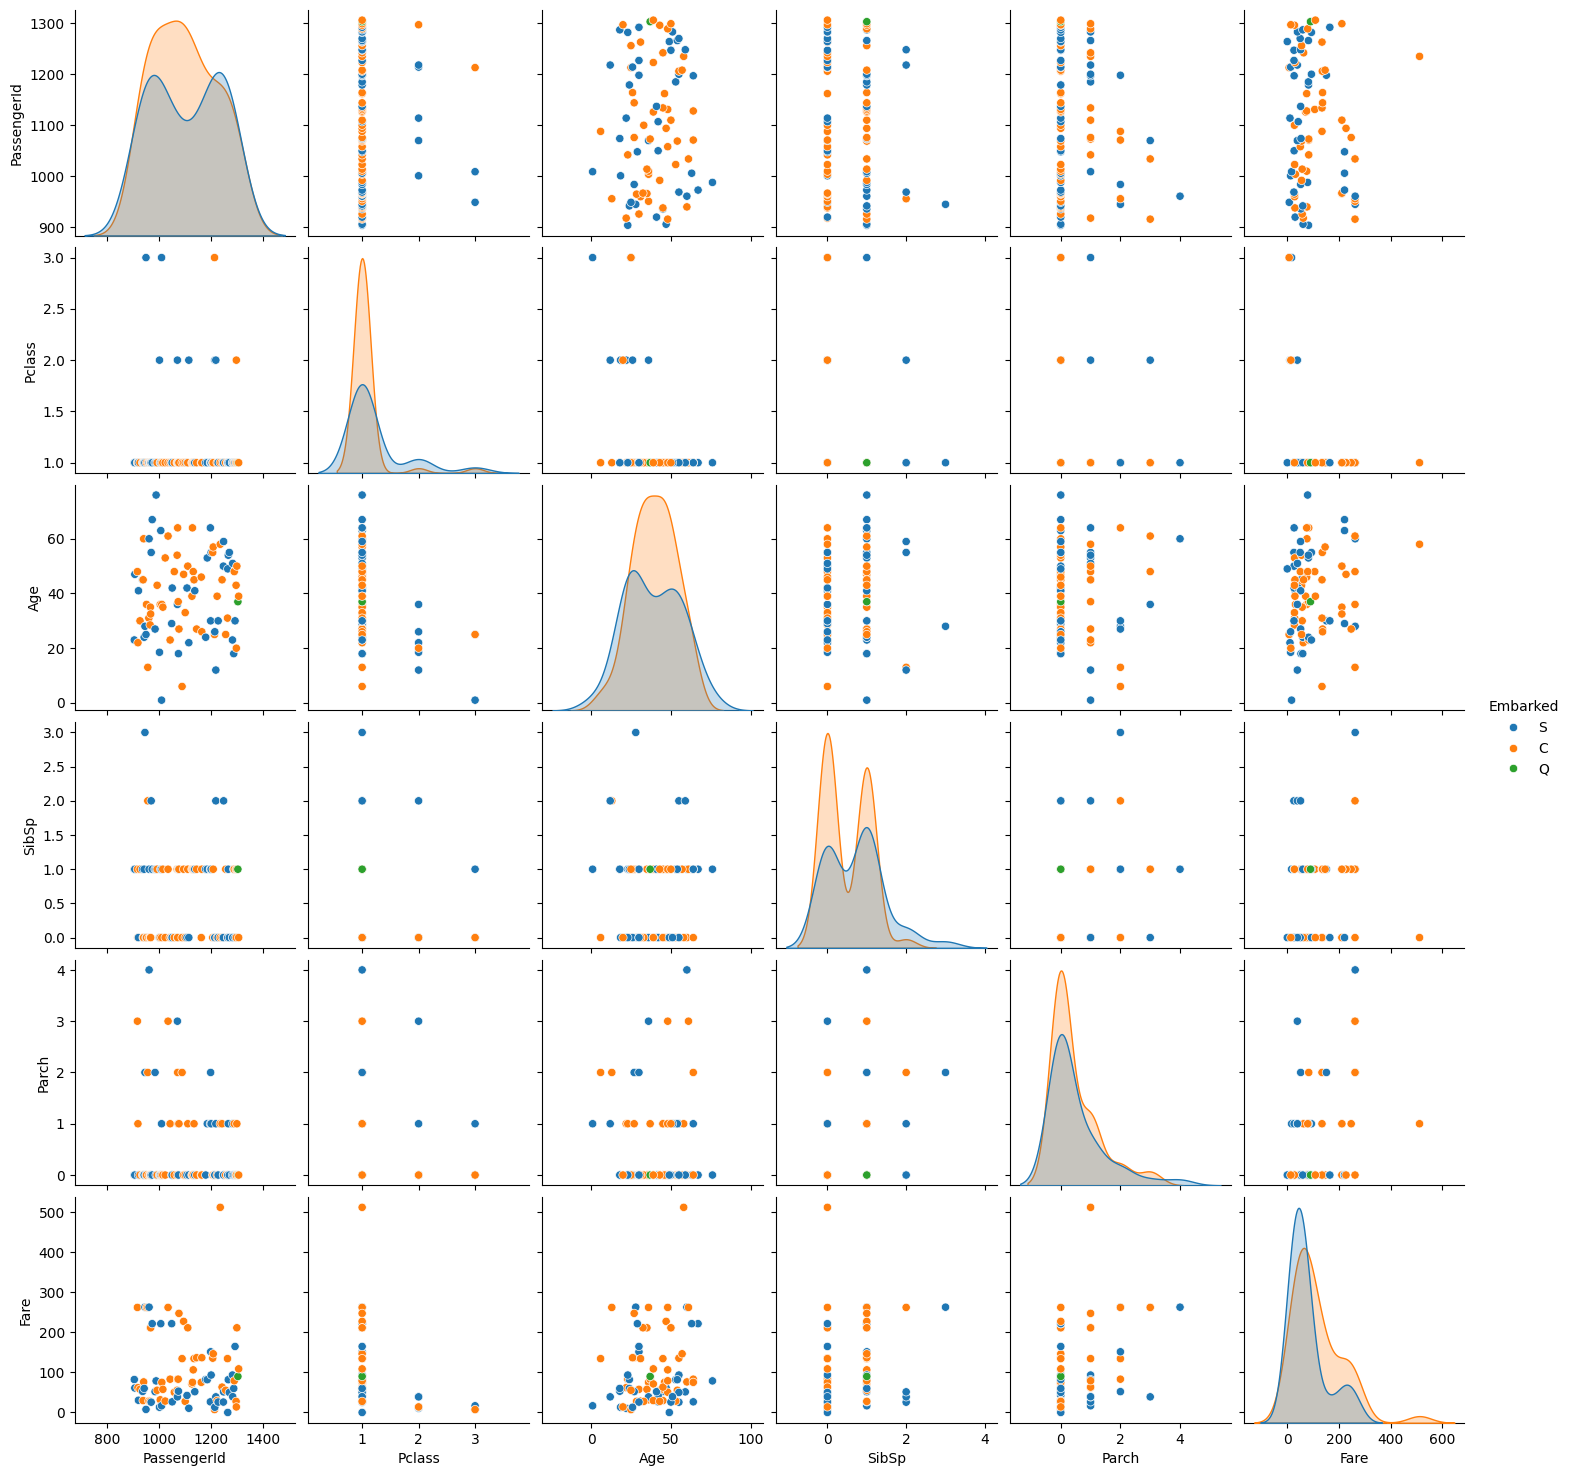

In [ ]:
# Create a list of numeric columns
numeric_columns = titanic.select_dtypes(include=['int64', 'float64']).columns

# Plot the skewness of each numeric column
for col in numeric_columns:
  plt.figure()
  sns.distplot(titanic[col])
  plt.title('Skewness Plot for ' + col)
  plt.show()

# Check for missing values in the 'Embarked' column
missing_values = titanic['Embarked'].isnull().sum()
if missing_values > 0:
  # Handle missing values in the 'Embarked' column
  # For example, you could impute the missing values with the most frequent value
  titanic['Embarked'].fillna(titanic['Embarked'].mode()[0], inplace=True)

# Create a pairplot with the 'Embarked' column as the hue
sns.pairplot(titanic, hue='Embarked')

# Identify the non-numeric column
non_numeric_cols = titanic.select_dtypes(include=['object']).columns

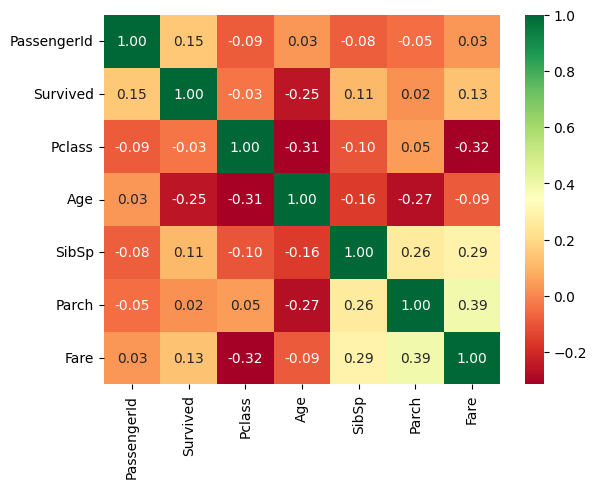

In [ ]:

# Drop the non-numeric columns
titanic = titanic.drop(non_numeric_cols, axis=1)
titanic.corr()
import matplotlib.pyplot as plt
import seaborn as sns
corr = Tit.corr()
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, cmap='RdYlGn', fmt='.2f')
plt.show()
from sklearn.preprocessing import LabelEncoder


In [ ]:
le = LabelEncoder()

for column in titanic.select_dtypes(include='object'):
    titanic[column] = le.fit_transform(titanic[column])

In [ ]:

titanic.head()


,PassengerId,Pclass,Age,SibSp,Parch,Fare
12,904,1,23.0,1,0,82.2667
14,906,1,47.0,1,0,61.1750
24,916,1,48.0,1,3,262.3750
26,918,1,22.0,0,1,61.9792
28,920,1,41.0,0,0,30.5000


In [ ]:

titanic.info()

<class 'pandas.core.frame.DataFrame'>
Index: 87 entries, 12 to 414
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  87 non-null     int64  
 1   Pclass       87 non-null     int64  
 2   Age          87 non-null     float64
 3   SibSp        87 non-null     int64  
 4   Parch        87 non-null     int64  
 5   Fare         87 non-null     float64
dtypes: float64(2), int64(4)
memory usage: 4.8 KB


In [ ]:
titanic.info()


<class 'pandas.core.frame.DataFrame'>
Index: 87 entries, 12 to 414
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  87 non-null     int64  
 1   Pclass       87 non-null     int64  
 2   Age          87 non-null     float64
 3   SibSp        87 non-null     int64  
 4   Parch        87 non-null     int64  
 5   Fare         87 non-null     float64
dtypes: float64(2), int64(4)
memory usage: 4.8 KB


In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
scaler = MinMaxScaler()
titanic_scaled = scaler.fit_transform(titanic)

In [ ]:
titanic_scaled = pd.DataFrame(titanic_scaled, columns=titanic.columns)
titanic_scaled.head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
0,0.000000,0.0,0.293333,0.333333,0.00,0.160574
1,0.004975,0.0,0.613333,0.333333,0.00,0.119406
2,0.029851,0.0,0.626667,0.333333,0.75,0.512122
3,0.034826,0.0,0.280000,0.000000,0.25,0.120975
4,0.039801,0.0,0.533333,0.000000,0.00,0.059532


In [ ]:
titanic.head(1)

,PassengerId,Pclass,Age,SibSp,Parch,Fare
12,904,1,23.0,1,0,82.2667


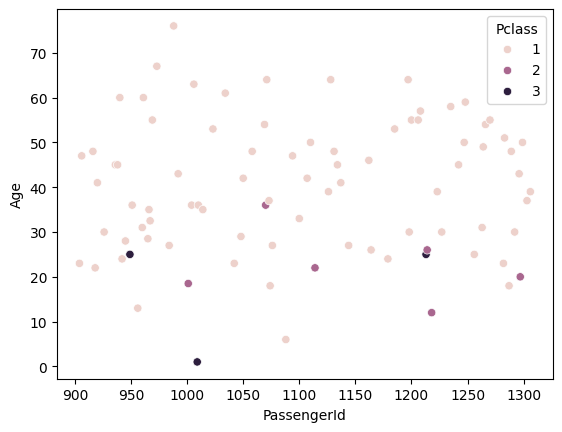

In [ ]:
sns.scatterplot(x="PassengerId", y="Age", hue="Pclass", data=titanic, legend="brief")
plt.show()

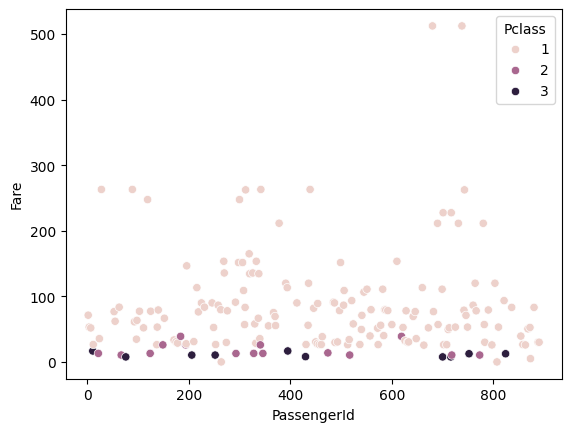

In [ ]:
sns.scatterplot(x="PassengerId", y="Fare", hue="Pclass", data=Tit, legend="brief")
plt.show()

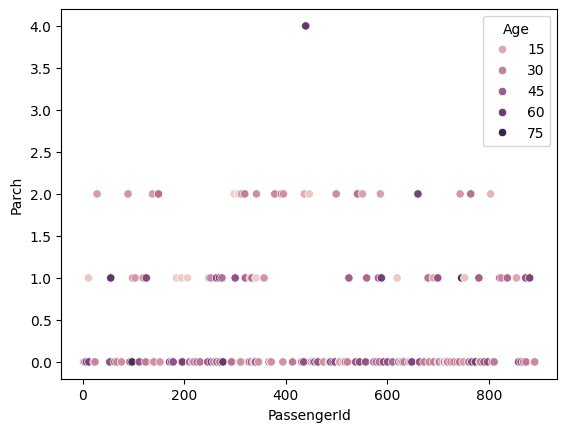

In [ ]:
sns.scatterplot(x="PassengerId", y="Parch", hue="Age", data=Tit, legend="brief")
plt.show()

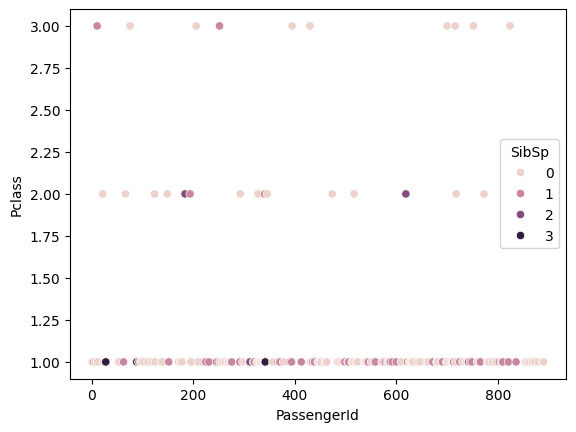

In [ ]:
sns.scatterplot(x="PassengerId", y="Pclass", hue="SibSp", data=Tit, legend="brief")
plt.show()

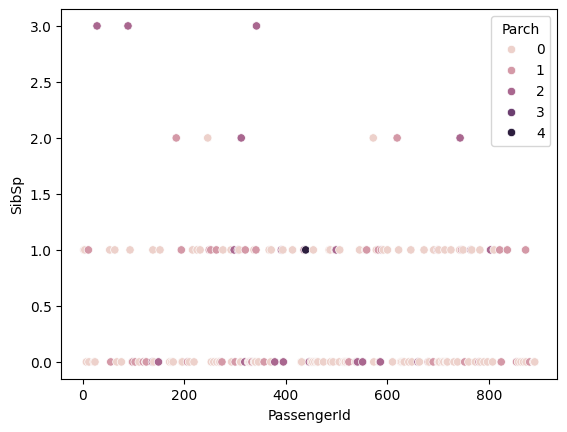

In [ ]:
sns.scatterplot(x="PassengerId", y="SibSp", hue="Parch", data=Tit, legend="brief")
plt.show()

In [ ]:

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [ ]:
## divide the data into x and y or input or output variables
X= titanic.iloc[:, :-1]   ## independent variable set
y = titanic.iloc[:, -1]  ### dependent varable set
X
y

12      82.2667
14      61.1750
24     262.3750
26      61.9792
28      30.5000
         ...   
404     27.7208
405     13.8625
407    211.5000
411     90.0000
414    108.9000
Name: Fare, Length: 87, dtype: float64

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
scaler = MinMaxScaler()

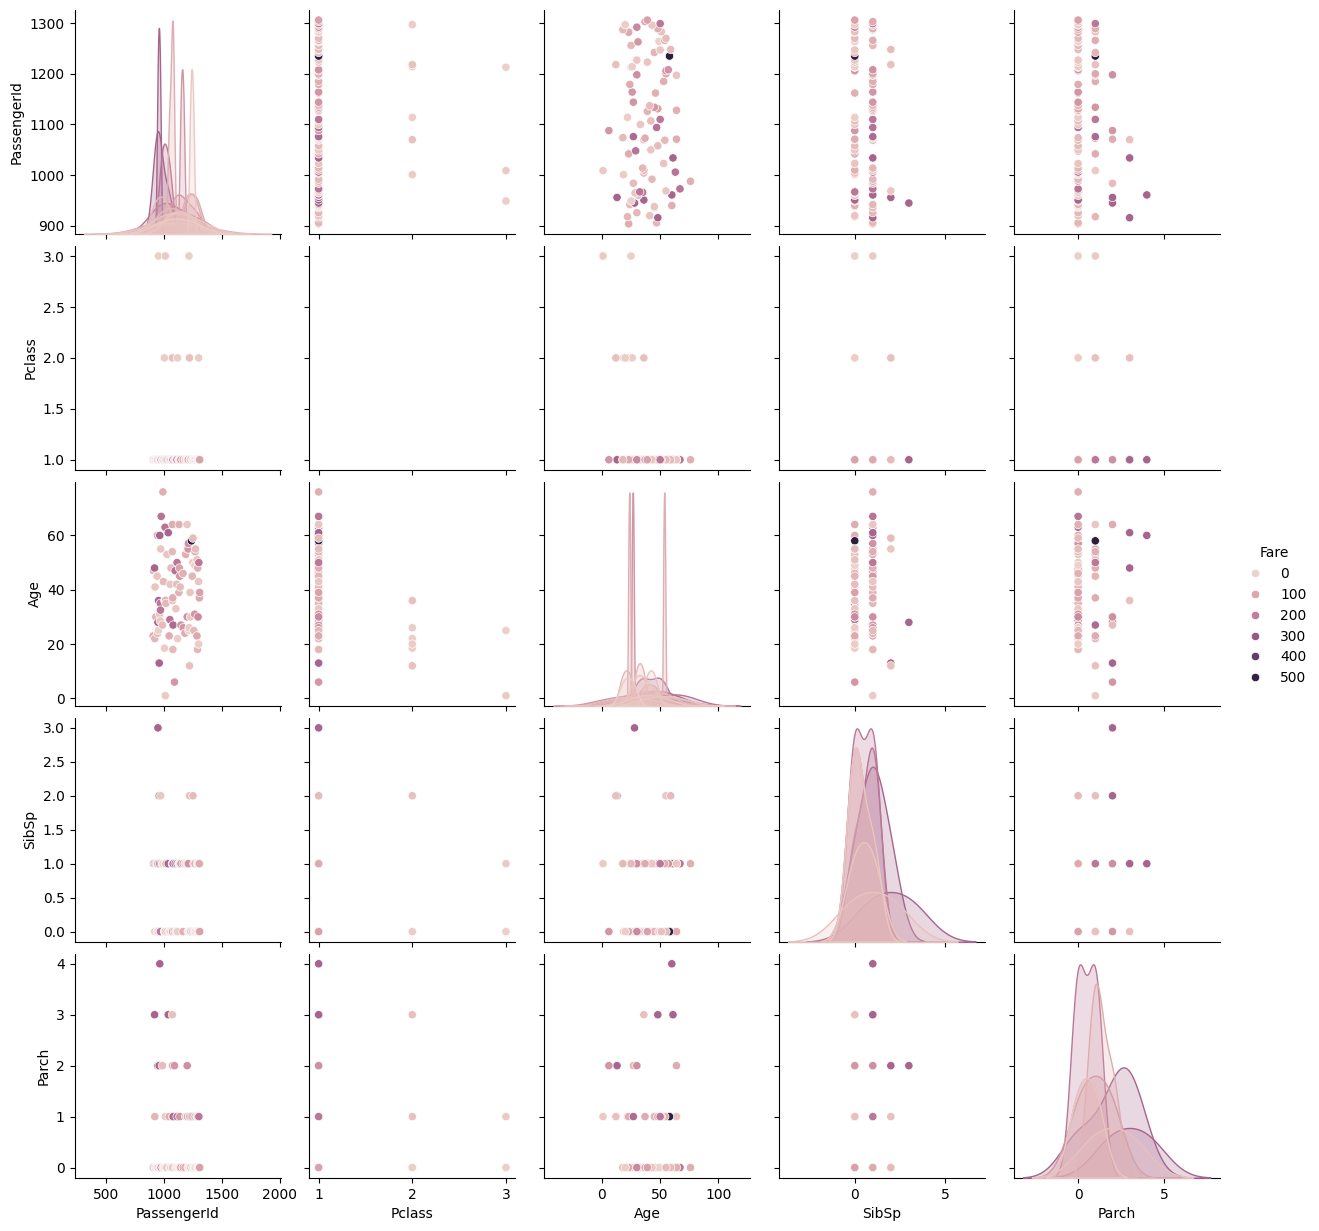

In [ ]:

sns.pairplot(titanic, hue='Fare')
# Identify the non-numeric column
non_numeric_cols = titanic.select_dtypes(include=['object']).columns

In [ ]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
print(y_train.dtype)

float64


In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:

le = LabelEncoder()
y_train = le.fit_transform(y_train)
model = LogisticRegression()
model.fit(X_train_scaled, y_train)
predictions = model.predict(X_test_scaled)
y_test = pd.to_numeric(y_test)
y_test = pd.to_numeric(y_test)

In [ ]:
# Convert y_test to a categorical type
y_test = y_test.astype('category')

In [ ]:
# Use the LabelEncoder to transform y_test
le = LabelEncoder()
y_test = le.fit_transform(y_test)

In [ ]:
# Calculate the accuracy score
accuracy = accuracy_score(y_test, predictions)
print(f'Accuracy: {accuracy}')
import pandas as pd
import numpy as np
print(f"Data type of x: {type(X)}")
print(f"Data type of y: {type(y)}")
from sklearn.preprocessing import LabelEncoder

Accuracy: 0.0
Data type of x: <class 'pandas.core.frame.DataFrame'>
Data type of y: <class 'pandas.core.series.Series'>


In [ ]:

# Instantiate the LabelEncoder
le = LabelEncoder()

# Fit the LabelEncoder to the y variable
le.fit(y)

# Transform the y variable using the fitted LabelEncoder
y = le.transform(y)

In [ ]:
# Instantiate and fit the Logistic Regression model
classifier = LogisticRegression()
classifier.fit(X, y)
## logistic regression and fit the model
classifier = LogisticRegression()  ## initilize the model i.e. called instance creation of class object.
# first create object 'classifier' for class logisticregression
classifier.fit(X,y)  ## then use this object to fit the model. this is the std methodology to build any algo. i
## predict for x
y_pred = classifier.predict(X)
y_pred
y = pd.DataFrame(y)
y.head()

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



,0
0,39
1,29
2,55
3,30
4,14


In [ ]:
## confusion matrix for to analyze how many wrong predctions are there in the table

from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y,y_pred)
print(confusion_matrix)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 1 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 1 0 0]]
